In [79]:
# Checking for missing values
print(df.isnull().sum())


Date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


In [80]:
# Drop unnecessary columns
df.drop(columns=['Ticker'], errors='ignore')  # Drop if exists


,Date,1. open,2. high,3. low,4. close,5. volume
0,1999-11-01,80.000,80.6900,77.37,77.62,2487300.0
1,1999-11-02,78.000,81.6900,77.31,80.25,3564600.0
2,1999-11-03,81.620,83.2500,81.00,81.50,2932700.0
3,1999-11-04,82.060,85.3700,80.62,83.62,3384700.0
4,1999-11-05,84.620,88.3700,84.00,88.31,3721500.0
...,...,...,...,...,...,...
6376,2025-03-10,235.540,236.1600,224.22,227.48,71451281.0
6377,2025-03-11,223.805,225.8399,217.45,220.84,76137410.0
6378,2025-03-12,220.140,221.7500,214.91,216.98,62547467.0
6379,2025-03-13,215.950,216.8394,208.42,209.68,61368330.0


In [81]:
df['Date']

0       1999-11-01
1       1999-11-02
2       1999-11-03
3       1999-11-04
4       1999-11-05
           ...    
6376    2025-03-10
6377    2025-03-11
6378    2025-03-12
6379    2025-03-13
6380    2025-03-14
Name: Date, Length: 6381, dtype: object

In [82]:
import datetime

# Define the conversion function
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Drop rows where 'Date' is NaN
df = df.dropna(subset=['Date'])

# Convert the 'Date' column to string type
df['Date'] = df['Date'].astype(str)

# Apply the custom function
df['Date'] = df['Date'].apply(str_to_datetime)

# Check the result
df['Date']

0      1999-11-01
1      1999-11-02
2      1999-11-03
3      1999-11-04
4      1999-11-05
          ...    
6376   2025-03-10
6377   2025-03-11
6378   2025-03-12
6379   2025-03-13
6380   2025-03-14
Name: Date, Length: 6381, dtype: datetime64[ns]

In [83]:
print(df.columns)

Index(['Date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [84]:
df.index=df.pop('Date')
df

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
1999-11-01,80.000,80.6900,77.37,77.62,2487300.0
1999-11-02,78.000,81.6900,77.31,80.25,3564600.0
1999-11-03,81.620,83.2500,81.00,81.50,2932700.0
1999-11-04,82.060,85.3700,80.62,83.62,3384700.0
1999-11-05,84.620,88.3700,84.00,88.31,3721500.0
...,...,...,...,...,...
2025-03-10,235.540,236.1600,224.22,227.48,71451281.0
2025-03-11,223.805,225.8399,217.45,220.84,76137410.0
2025-03-12,220.140,221.7500,214.91,216.98,62547467.0


In [85]:
df1=df.reset_index()['4. close']
df1


0        77.62
1        80.25
2        81.50
3        83.62
4        88.31
         ...  
6376    227.48
6377    220.84
6378    216.98
6379    209.68
6380    213.49
Name: 4. close, Length: 6381, dtype: float64

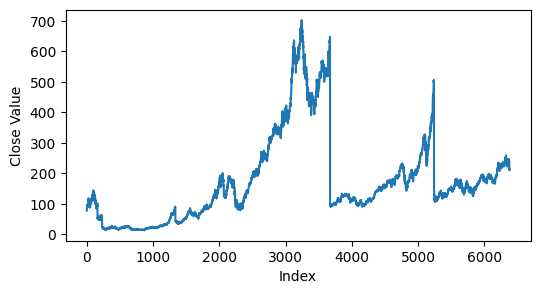

In [86]:
import matplotlib.pyplot as plt

# Plot raw data for comparison
plt.figure(figsize=(6, 3))  # Adjust figure size
plt.plot(df1)  # Plot original data
plt.xlabel('Index')  # Label x-axis
plt.ylabel('Close Value')  # Label y-axis
plt.show()


In [87]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [89]:
df1

array([[0.09361665],
       [0.09743389],
       [0.09924816],
       ...,
       [0.29588667],
       [0.2852913 ],
       [0.29082121]])

In [90]:

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [91]:
training_size,test_size

(4147, 2234)

In [92]:
# print("Train Data: \n\n", train_data, "\n\n\nTest Data: \n\n", test_data)

In [93]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [94]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train[-10000:]  # Use last 10,000 time steps
y_train = y_train[-10000:]  



In [95]:
print(X_train)

[[0.09361665 0.09743389 0.09924816 ... 0.1768121  0.19023774 0.18605765]
 [0.09743389 0.09924816 0.10232518 ... 0.19023774 0.18605765 0.18225493]
 [0.09924816 0.10232518 0.10913234 ... 0.18605765 0.18225493 0.18351766]
 ...
 [0.15226857 0.15194926 0.15266045 ... 0.13695608 0.13612877 0.13644808]
 [0.15194926 0.15266045 0.15126709 ... 0.13612877 0.13644808 0.13476443]
 [0.15266045 0.15126709 0.14972858 ... 0.13644808 0.13476443 0.13434352]]


In [96]:
# Print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4046, 100)
X_test shape: (2133, 100)
y_train shape: (4046,)
y_test shape: (2133,)


In [97]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile Model
model.compile(loss='mean_squared_error', optimizer='adam')

# Save the trained model (after training)
model.save("StockSanket.h5")



# Print the model summary (optional)
model.summary()


c:\Users\Bishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler_X.transform(X_test.reshape(X_test.shape[0], -1))

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape back to LSTM format
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], 1)


In [100]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_scaled, y_train_scaled, 
          validation_data=(X_test_scaled, y_test_scaled), 
          epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 34s 154ms/step - loss: 0.0220 - val_loss: 0.0013
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - loss: 0.0033 - val_loss: 9.1410e-04
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - loss: 0.0024 - val_loss: 8.1684e-04
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - loss: 0.0025 - val_loss: 8.9603e-04
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.0021 - val_loss: 8.3102e-04
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.0018 - val_loss: 6.4925e-04
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - loss: 0.0017 - val_loss: 6.2012e-04
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - loss: 0.0015 - val_loss: 6.3242e-04
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - loss: 0.0016 - val_loss: 5.6372e-04
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - loss: 0.

In [101]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [102]:
###prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [193]:
# Clearly inverse-transform predictions and y_test:
test_predict_actual = scaler.inverse_transform(test_predict.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Clearly check actual vs predicted DataFrame:
df_accuracy_check = pd.DataFrame({
    "Actual": y_test_actual.flatten(),
    "Predicted": test_predict_actual.flatten()
})

print(df_accuracy_check.head(10))


   Actual   Predicted
0  113.58  111.536591
1  113.57  113.354828
2  113.55  114.693520
3  114.62  115.457870
4  112.71  115.828156
5  112.88  115.758400
6  113.09  115.396927
7  113.95  114.941223
8  112.18  114.615021
9  113.05  114.307465


In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.022409646473738883

In [104]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.018886675360721954

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute all metrics
mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

# Print results
print("📊 **LSTM Model Performance:**")
print(f"   🔹 MSE: {mse:.4f}")
print(f"   🔹 RMSE: {rmse:.4f}")
print(f"   🔹 MAE: {mae:.4f}")
print(f"   🔹 R² Score: {r2:.4f}")  # Closer to 1 is better


📊 **LSTM Model Performance:**
   🔹 MSE: 0.0004
   🔹 RMSE: 0.0189
   🔹 MAE: 0.0068
   🔹 R² Score: 0.9505


In [106]:
# Convert predictions back to original stock price scale
test_predict_original = scaler_y.inverse_transform(test_predict)
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Compute MAPE correctly
mape = np.mean(np.abs((y_test_original - test_predict_original) / np.abs(y_test_original))) * 100

# Compute accuracy
accuracy = 100 - mape

print(f"📊 **LSTM Model Prediction Accuracy (Fixed Scaling):** {accuracy:.2f}%")


📊 **LSTM Model Prediction Accuracy (Fixed Scaling):** 97.20%


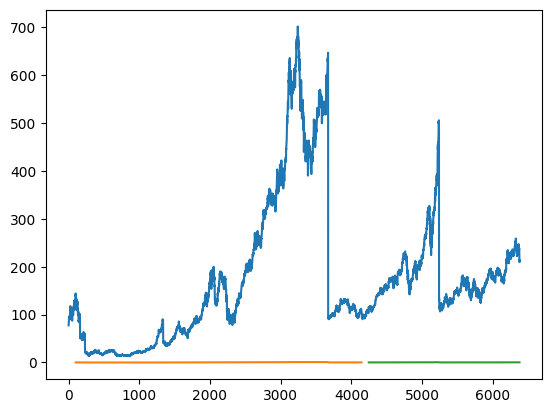

In [107]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [108]:
len(test_data)


2234

In [109]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1893)

In [110]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [111]:
temp_input

[0.219062962640425,
 0.21620366338645536,
 0.2159569218264681,
 0.21501349821475224,
 0.21119626113965573,
 0.21536183924061655,
 0.21443292983831172,
 0.2126767104995791,
 0.21068826381027025,
 0.2130105373160324,
 0.21125431797729977,
 0.21134140323376585,
 0.20748062353043628,
 0.2035908154082847,
 0.20141368399663268,
 0.19946877993555692,
 0.20322796017300937,
 0.20481000899880983,
 0.20343115910476356,
 0.2046503526952887,
 0.2042004122035473,
 0.20517286423408515,
 0.2037214432929838,
 0.20649365729048738,
 0.2063630294057883,
 0.207146796713983,
 0.2072338819704491,
 0.20817730558216496,
 0.20737902406455921,
 0.20881593079624955,
 0.2130105373160324,
 0.21386687567128218,
 0.21283636680310022,
 0.20734999564573717,
 0.20774187929983454,
 0.2076257656245464,
 0.20897558709977068,
 0.20797410665041074,
 0.2094255275915121,
 0.21761154169932365,
 0.22293825655316554,
 0.22630555313652065,
 0.22318499811315276,
 0.22495573166129643,
 0.2313274695927313,
 0.23386745623965863,
 0.23

In [112]:
import numpy as np

if np.any(np.isnan(x_input)) or np.any(np.isinf(x_input)):
    print("🚨 ERROR: x_input contains NaN or Inf values!")
else:
    print("✅ x_input is clean, proceeding with prediction.")


✅ x_input is clean, proceeding with prediction.


In [189]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# ✅ Load the trained LSTM model
model = load_model("StockSanket.h5")  # Replace with your actual model file
model.compile(loss='mean_squared_error', optimizer='adam')  # Ensure model is compiled

# ✅ Debug: Check if LSTM layers are stateful
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.LSTM):
        print(f"LSTM Layer: {layer.name}, Stateful: {layer.stateful}")

# ✅ Initialize parameters
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        # ✅ Extract last `n_steps` (100) values for prediction
        x_input_reshaped = np.array(temp_input[-n_steps:]).reshape(1, 100)  # Shape: (1, 100)

        # ✅ Fix: Ensure MinMaxScaler expects (1, 100), not (100, 1)
        x_input_scaled = scaler_X.transform(x_input_reshaped)  # Shape: (1, 100)
        x_input_scaled = x_input_scaled.reshape(1, 100, 1)  # Match LSTM expected input (1, 100, 1)

        # ✅ Convert input to TensorFlow tensor
        x_input_tf = tf.convert_to_tensor(x_input_scaled, dtype=tf.float32)

        # ✅ Debugging: Check for NaN, Inf, or extreme values
        if np.any(np.isnan(x_input_tf.numpy())) or np.any(np.isinf(x_input_tf.numpy())):
            print("🚨 ERROR: x_input contains NaN or Inf values!")
            break
        else:
            print(f"✅ Day {i+1} Input Values (First 10): {x_input_tf.numpy().flatten()[:10]}")

        # ✅ Predict the next value
        yhat = model.predict(x_input_tf, verbose=0)

        # ✅ Debugging: Print the prediction output
        print(f"✅ Day {i+1} Predicted Value: {yhat[0][0]}")

        # ✅ Append prediction to inputs for future predictions
        temp_input.append(float(yhat[0][0]))  # Ensure value is float
        lst_output.append(float(yhat[0][0]))  

    else:
        print(f"❌ Not enough data for prediction. Required: {n_steps}, Found: {len(temp_input)}")
        break

    i += 1  # Move to the next day

# ✅ Print final predicted outputs
print("✅ Predicted outputs for the next 30 days:")
print(lst_output)


LSTM Layer: lstm_6, Stateful: False
LSTM Layer: lstm_7, Stateful: False
LSTM Layer: lstm_8, Stateful: False
✅ Day 1 Input Values (First 10): [0.3287033  0.33314463 0.33366716 0.3337107  0.33342043 0.33909547
 0.34057593 0.33871812 0.3408517  0.34109843]
✅ Day 1 Predicted Value: 0.001060208072885871
✅ Day 2 Input Values (First 10): [0.33314463 0.33366716 0.3337107  0.33342043 0.33909547 0.34057593
 0.33871812 0.3408517  0.34109843 0.34532207]
✅ Day 2 Predicted Value: 0.0009642453514970839
✅ Day 3 Input Values (First 10): [0.33366716 0.3337107  0.33342043 0.33909547 0.34057593 0.33871812
 0.3408517  0.34109843 0.34532207 0.34886354]
✅ Day 3 Predicted Value: 0.0008721645572222769
✅ Day 4 Input Values (First 10): [0.3337107  0.33342043 0.33909547 0.34057593 0.33871812 0.3408517
 0.34109843 0.34532207 0.34886354 0.34098232]
✅ Day 4 Predicted Value: 0.0007850209949538112
✅ Day 5 Input Values (First 10): [0.33342043 0.33909547 0.34057593 0.33871812 0.3408517  0.34109843
 0.34532207 0.34886354

In [114]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [126]:
%pip install mplfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [188]:
# ✅ Print the next 30 days of predicted closing prices
print("📊 Next 30 Days Predicted Closing Prices:")
print(df_pred["Close"])


📊 Next 30 Days Predicted Closing Prices:
2025-03-17   -0.020359
2025-03-18   -0.019745
2025-03-19   -0.018668
2025-03-20   -0.017207
2025-03-21   -0.015478
2025-03-24   -0.013602
2025-03-25   -0.011682
2025-03-26   -0.009797
2025-03-27   -0.008010
2025-03-28   -0.006360
2025-03-31   -0.004872
2025-04-01   -0.003559
2025-04-02   -0.002424
2025-04-03   -0.001460
2025-04-04   -0.000659
2025-04-07   -0.000007
2025-04-08    0.000510
2025-04-09    0.000908
2025-04-10    0.001204
2025-04-11    0.001412
2025-04-14    0.001546
2025-04-15    0.001620
2025-04-16    0.001645
2025-04-17    0.001632
2025-04-18    0.001589
2025-04-21    0.001524
2025-04-22    0.001444
2025-04-23    0.001353
2025-04-24    0.001257
2025-04-25    0.001159
Freq: B, Name: Close, dtype: float64


In [197]:
# Verify carefully inverse-scaled predictions:
test_predict_actual = scaler.inverse_transform(test_predict.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Clearly display predictions alongside actual values
df_check_predictions = pd.DataFrame({
    "Actual Prices": y_test_actual.flatten(),
    "Predicted Prices": test_predict_actual.flatten()
})

df_check_predictions.head(15)


,Actual Prices,Predicted Prices
0,113.58,111.536591
1,113.57,113.354828
2,113.55,114.693520
3,114.62,115.457870
4,112.71,115.828156
5,112.88,115.758400
6,113.09,115.396927
7,113.95,114.941223
8,112.18,114.615021
9,113.05,114.307465


In [244]:
# Select exactly 10 historical rows clearly
df_hist_10 = df_combined[df_combined["Type"]=="Historical"].iloc[-10:].copy()

# Select exactly 30 inverse-scaled predictions
df_pred_30_prices = test_predict_actual.flatten()[:30]

# Explicitly generate next 30 BUSINESS DAYS (skipping weekends)
predicted_dates_30 = pd.date_range(
    start=df_hist_10["Date"].iloc[-1] + pd.Timedelta(days=1), 
    periods=30, 
    freq='B'  # 'B' explicitly for Business days (no weekends)
)

# Clearly create the corrected combined dataframe
df_corrected = pd.DataFrame({
    "Date": list(df_hist_10["Date"]) + list(predicted_dates_30),
    "Closing Price": list(df_hist_10["Closing Price"]) + list(df_pred_30_prices),
    "Type": ["Historical"] * 10 + ["Predicted"] * 30
})

# Set Date explicitly as index
df_corrected.set_index("Date", inplace=True)

# Clearly verify correctness
df_corrected


,Closing Price,Type
Date,,
2025-03-03,238.030000,Historical
2025-03-04,235.930000,Historical
2025-03-05,235.740000,Historical
2025-03-06,235.330000,Historical
2025-03-07,239.070000,Historical
2025-03-10,227.480000,Historical
2025-03-11,220.840000,Historical
2025-03-12,216.980000,Historical
2025-03-13,209.680000,Historical


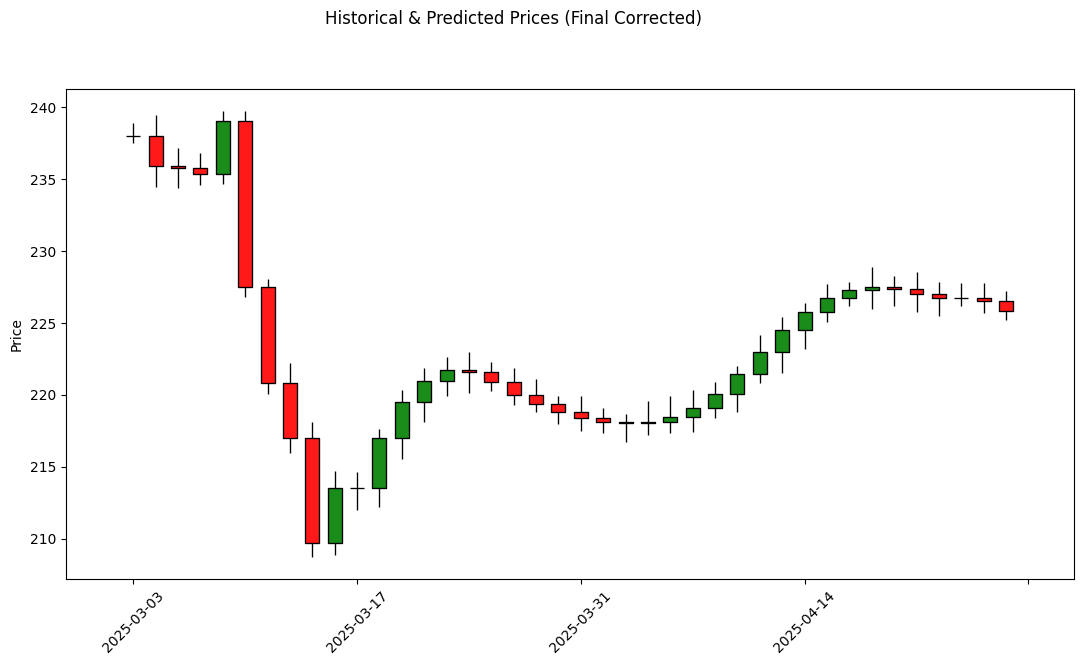

In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf

# ✅ --- Step 1: Separate Last 10 Historical & Next 30 Predicted Data ---
hist_data = df_corrected[df_corrected["Type"] == "Historical"].iloc[-10:].copy()
pred_data = df_corrected[df_corrected["Type"] == "Predicted"].iloc[:30].copy()

# ✅ --- Step 2: Ensure Predicted Data Starts Immediately After Historical Data ---
last_hist_date = hist_data.index[-1]  # Get last historical date
pred_dates = pd.bdate_range(start=last_hist_date + pd.Timedelta(days=1), periods=len(pred_data), freq='B')

# Assign corrected business day dates explicitly
pred_data.index = pred_dates  # Ensures prediction starts right after historical data

# ✅ --- Step 3: Smooth Price Transition from Historical to Predicted ---
last_hist_close = hist_data["Closing Price"].iloc[-1]  # Get last historical close price
first_pred_open = pred_data["Closing Price"].iloc[0]

# Compute an adjustment factor to smooth transition
adjustment_factor = last_hist_close / first_pred_open
pred_data["Closing Price"] *= adjustment_factor

# ✅ --- Step 4: Generate OHLC for Historical Data ---
np.random.seed(42)
hist_data["Open"] = hist_data["Closing Price"].shift(1)
hist_data.iloc[0, hist_data.columns.get_loc("Open")] = hist_data["Closing Price"].iloc[0]
hist_data["High"] = hist_data[["Open", "Closing Price"]].max(axis=1) + np.random.uniform(0.5, 1.5, len(hist_data))
hist_data["Low"] = hist_data[["Open", "Closing Price"]].min(axis=1) - np.random.uniform(0.5, 1.5, len(hist_data))
hist_data.rename(columns={"Closing Price": "Close"}, inplace=True)

# ✅ --- Step 5: Generate OHLC for Predicted Data ---
pred_data["Open"] = pred_data["Closing Price"].shift(1)
pred_data.iloc[0, pred_data.columns.get_loc("Open")] = last_hist_close  # Seamlessly connect to last hist close
pred_data["High"] = pred_data[["Open", "Closing Price"]].max(axis=1) + np.random.uniform(0.5, 1.5, len(pred_data))
pred_data["Low"] = pred_data[["Open", "Closing Price"]].min(axis=1) - np.random.uniform(0.5, 1.5, len(pred_data))
pred_data.rename(columns={"Closing Price": "Close"}, inplace=True)

# ✅ --- Step 6: Combine Historical & Predicted Data Into One DataFrame ---
df_final = pd.concat([hist_data, pred_data])

# ✅ --- Step 7: Define Explicit Colors ---
style_hist = mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up='green', down='red'))
style_pred = mpf.make_mpf_style(marketcolors=mpf.make_marketcolors(up='gray', down='gray'))

# ✅ --- Step 8: Plot Final Candlestick Chart ---
mpf.plot(df_final,
         type='candle',
         style=style_hist if df_final["Type"].iloc[0] == "Historical" else style_pred,
         ylabel='Price',
         8
         figsize=(14, 7),
         datetime_format='%Y-%m-%d')

# ✅ --- Step 9: Show Final Corrected Chart ---
mpf.show()


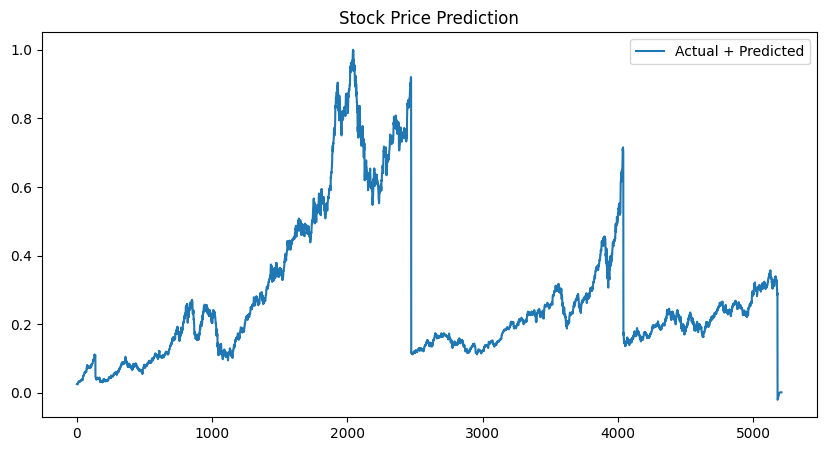

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Flatten df1 (if it's a NumPy array)
df3 = df1.flatten().tolist()  # Remove `.values`

# ✅ Extend with predictions
df3.extend(lst_output)

# ✅ Ensure df3 has enough data before plotting
if len(df3) > 1200:
    plt.figure(figsize=(10, 5))
    plt.plot(df3[1200:], label="Actual + Predicted")
    plt.legend()
    plt.title("Stock Price Prediction")
    plt.show()
else:
    print("🚨 Error: Not enough data points in df3 to plot from index 1200.")


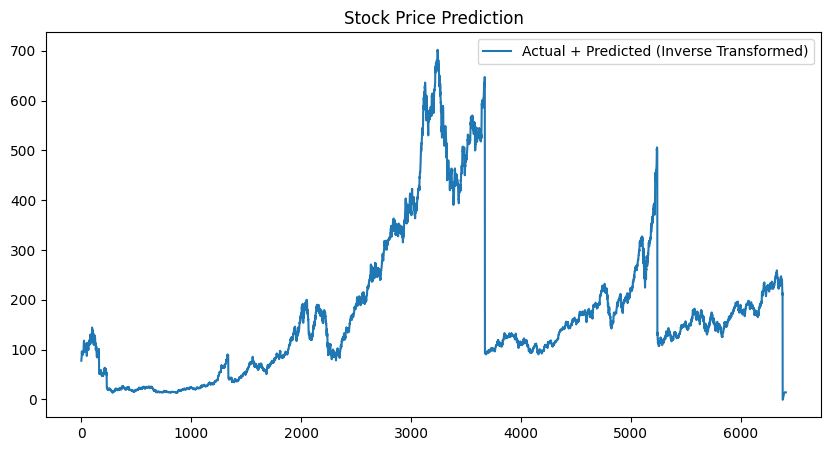

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Convert df3 to a NumPy array and reshape it to 2D
df3 = np.array(df3).reshape(-1, 1)  # Reshape to (rows, 1) before inverse scaling

# ✅ Apply inverse transformation
df3 = scaler.inverse_transform(df3).flatten()  # Convert back to 1D

# ✅ Plot the transformed values
plt.figure(figsize=(10, 5))
plt.plot(df3, label="Actual + Predicted (Inverse Transformed)")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()


In [1]:
import tensorflow as tf

MODEL_PATH = "C:/Users/Bishal/Desktop/Final Project/StockSanket/stocks/data/Latest_stock_price_model.keras"

# Load the model from the correct directory
model = tf.keras.models.load_model(MODEL_PATH)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!
